<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/MetacodeM/blob/main/%EC%9D%B4%EC%83%81%EA%B1%B0%EB%9E%98_%ED%83%90%EC%A7%80_%EB%AA%A8%EB%8D%B8__%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

약 28만건의 신용카드 거래 데이터 중에서 이상거래(Fraud)를 감지해내는 프로그램

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
# TensorFlow 라이브러리를 불러오기 (딥러닝 모델 구축에 사용)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
import tensorflow_addons as tfa
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from collections import Counter


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

In [ ]:
# pandas 라이브러리를 사용하여 지정된 경로에서 CSV 파일을 읽어들임. 각 필드는 쉼표(,)로 구분되며, 데이터 타입은 NumPy의 float32로 설정
df = pd.read_csv("/content/drive/MyDrive/딥러닝 스터디/이상거래 감지 프로젝트/creditcard (1).csv", delimiter=',', dtype=np.float32)

# DataFrame의 차원을 출력 (행과 열의 수)
print(df.shape)

# DataFrame의 처음 다섯 행을 출력하여 데이터의 형태를 미리 보기
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


# Missing Value Check

결측치 없음


In [ ]:
# DataFrame의 요약 정보를 출력
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

In [ ]:
# 각 열의 결측치(null 값) 수를 계산한 후, 전체 행 수로 나누어 결측치 비율을 계산
missing_ratio = df.isnull().sum() / df.shape[0]

# 결측치 비율을 출력
missing_ratio

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# Correlation Visualize

Feature들 사이의 상관관계를 확인합니다. Credit card 데이터의 경우에는 이미 한번 PCA를 거친 데이터이기 때문에 Feature들 사이의 상관관계가 매우 낮게 나옵니다.

하지만 amount 변수가 다른 변수와 상관관계가 비교적 높게 나와 amount 변수도 pca 처리했습니다.


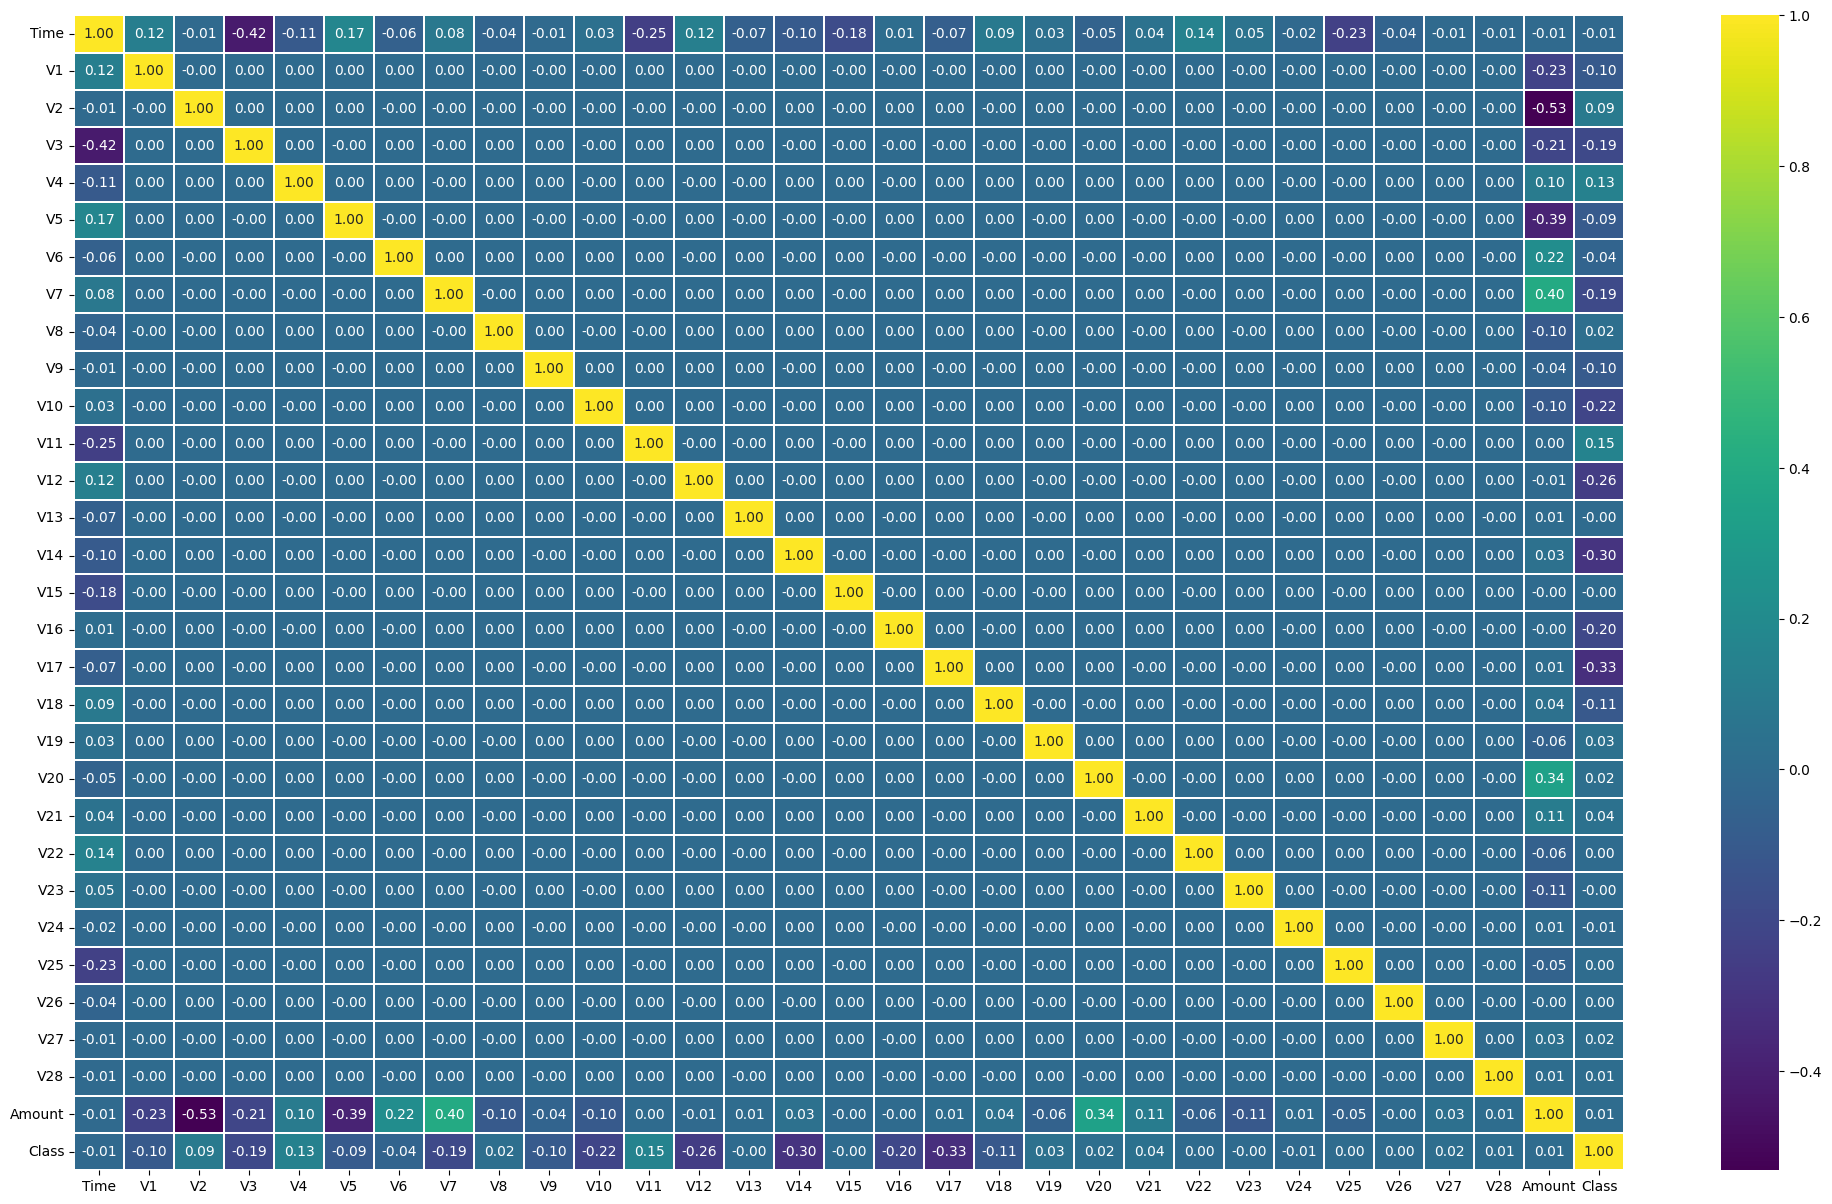

In [ ]:
# 서브플롯을 생성하여 크기를 설정 (figsize는 인치 단위로 크기 설정)
f, ax = plt.subplots(figsize=(25, 15))

# seaborn의 heatmap 함수를 사용하여 상관 행렬을 히트맵으로 시각화
# df.corr()은 DataFrame의 상관 행렬을 계산
# annot=True는 각 셀에 상관계수 값을 표시
# linewidths=0.3은 셀 경계의 두께를 설정
# fmt="0.2f"는 소수점 둘째 자리까지 상관계수 값을 표시
# ax=ax는 생성한 서브플롯을 지정
# cmap="viridis"는 히트맵의 색상 팔레트를 설정
seaborn.heatmap(df.corr(), annot=True, linewidths=0.3, fmt="0.2f", ax=ax, cmap="viridis")

# 히트맵을 화면에 표시
plt.show()

# EDA (Exploaratory Data Analysis)
데이터의 전체적인 구조를 살펴봅니다.

In [ ]:
# 'Class' 열의 각 값의 빈도수를 계산하여 출력
print(df["Class"].value_counts())

# 'Class' 열의 값 빈도수를 계산하고, 내림차순으로 정렬한 후 변수에 저장
count_classes = pd.value_counts(df["Class"], sort=True)

# 'Class' 열의 빈도수 데이터에서 상위 5개의 값을 출력
print(count_classes.head())
print()

# 'Class' 열의 각 값의 비율을 계산하여 출력
print(df["Class"].value_counts(normalize=True))

Class
0.0    284315
1.0       492
Name: count, dtype: int64
Class
0.0    284315
1.0       492
Name: count, dtype: int64

Class
0.0    0.998273
1.0    0.001727
Name: proportion, dtype: float64


0.0 : 정상거래
1.0 : 이상거래

정상거래는 28만 4315건, 이상거래는 492건이 존재합니다.
전체 데이터셋에서 오직 0.0017%가 이상거래이므로 심각한 imbalance가 존재하는 dataset임을 파악할 수 있습니다. 그러므로 일반적인 상황에서 주로 사용되는 Accuracy를 사용해서 모델의 Performance를 측정하기 어렵다는 결론이 도출됩니다. 따라서 모델을 설계할 때 정확도, 재현률 그리고 F1 Score를 사용하기로 결정하였습니다.

In [ ]:
492/284315

0.0017304750013189597

In [ ]:
df.drop(columns = "Time", inplace=True) #모델 예측에 불필요한 time 변수 제거
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

# Amount변수 pca 처리

상관관계 시각화 결과에서 amount 변수가 특정 컬럼과 상관계수가 비교적 높게 측정되어 pca처리하였습니다.

In [ ]:
# 'Amount' 컬럼에 대해 PCA 수행
pca = PCA(n_components=1)  # 1개의 주성분으로 변환할 PCA 객체를 생성합니다
column_to_transform = df[['Amount']]  # 'Amount' 컬럼만 선택하여 데이터프레임을 만듭니다
pca.fit(column_to_transform)  # 'Amount' 컬럼 데이터에 PCA를 적합시킵니다
transformed_column = pca.transform(column_to_transform)  # 'Amount' 컬럼 데이터를 주성분으로 변환합니다


In [ ]:
# 결과를 데이터프레임에 반영
df['Amount_PCA'] = transformed_column  # 변환된 'Amount' 컬럼을 새로운 컬럼으로 추가합니다

In [ ]:
df.drop(columns = "Amount", inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_PCA
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,61.270386
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-85.659607
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,290.310394
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,35.150391
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-18.359612


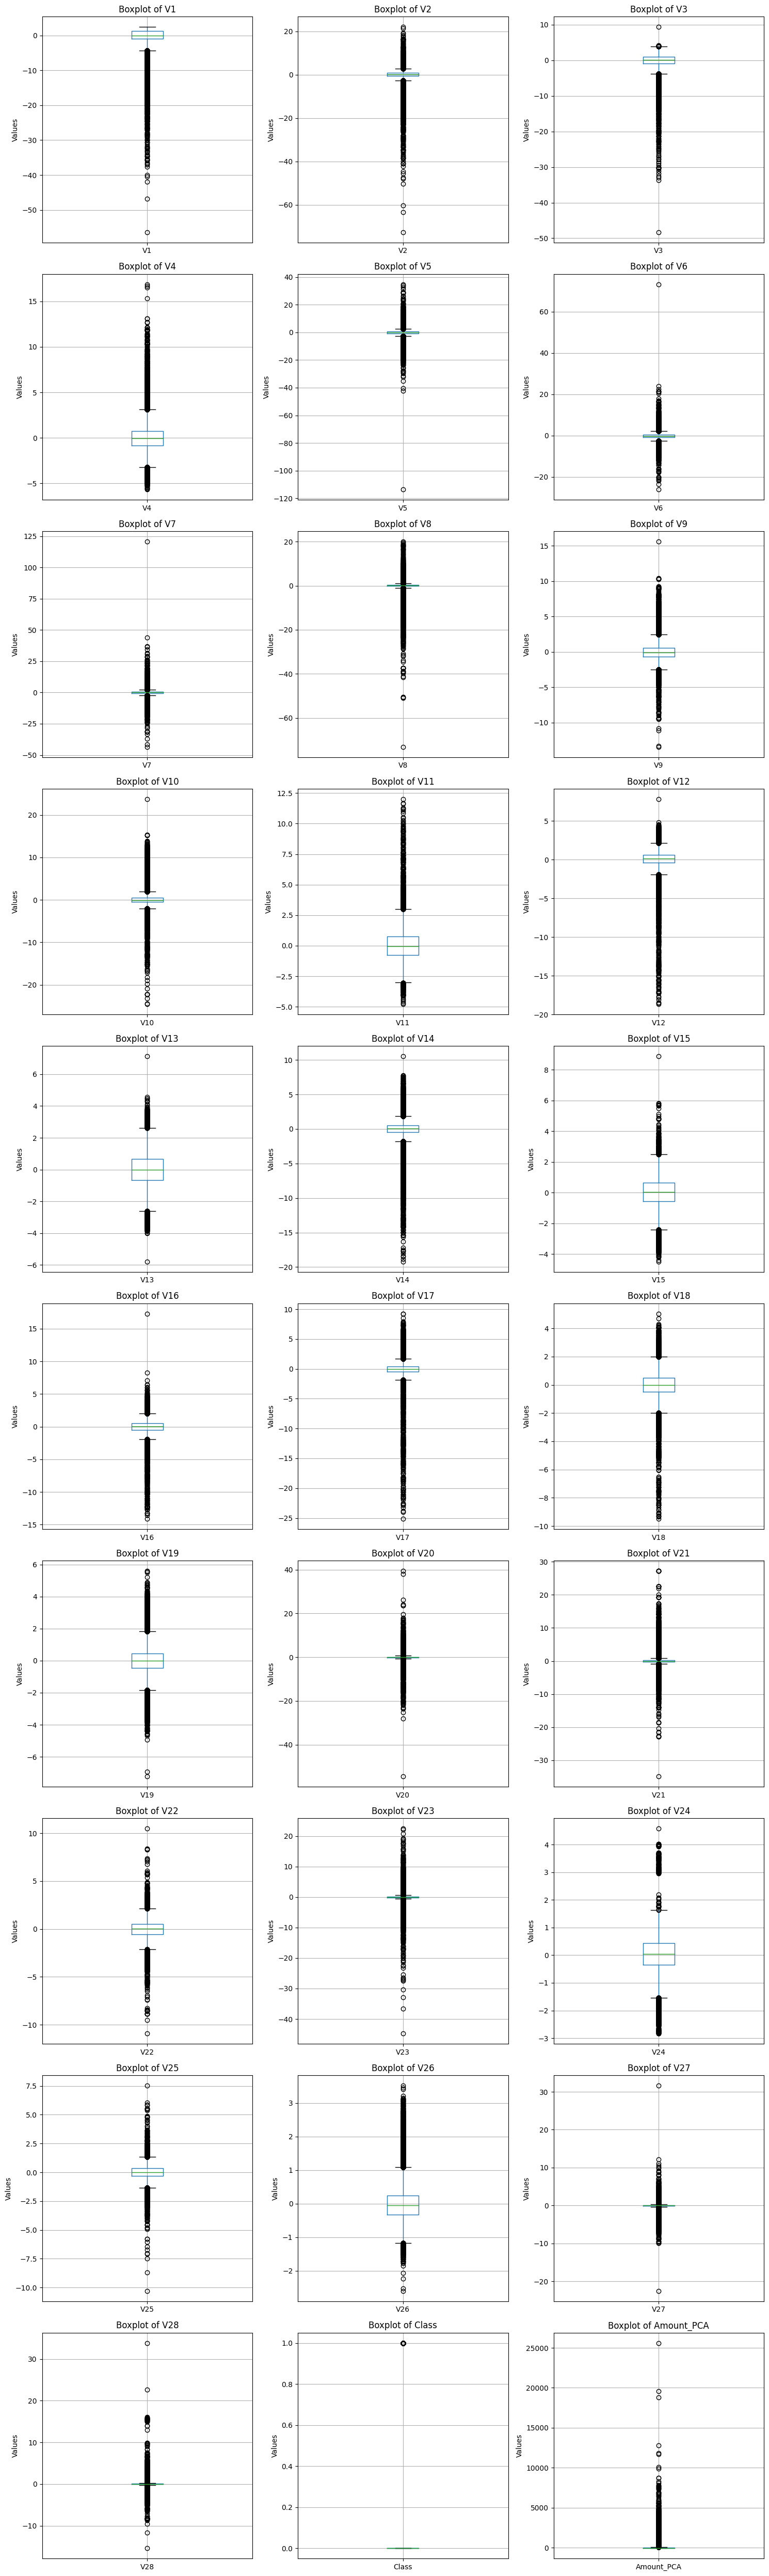

In [ ]:
# 컬럼 목록 가져오기
columns = df.columns

# 박스플롯을 3xN 형태로 출력
num_columns = 3
num_rows = (len(columns) + num_columns - 1) // num_columns

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# 플롯 생성
for i, column in enumerate(columns):
    row = i // num_columns
    col = i % num_columns
    df.boxplot(column=[column], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_ylabel('Values')

# 남는 subplot 숨기기
for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axs[j // num_columns, j % num_columns])

plt.tight_layout()
plt.show()

모든 변수에서 이상치가 많지만

이상치를 제거하기엔 타겟값의 데이터 손실이 발생할 수 있어 이상치를 처리하지 않겠습니다.


#Train, Test, Validation 분리
class 값이

0인 값에서 train test 비율을 7:3,

1인 값에서 train test 비율을 7:3으로 나누기




In [ ]:
# 클래스별 분리
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

# 클래스 0 분할
train_class_0, test_class_0 = train_test_split(df_class_0, test_size=0.3, random_state=42)

# 클래스 1 분할
train_class_1, test_class_1 = train_test_split(df_class_1, test_size=0.3, random_state=42)

# train 데이터 합치기
train = pd.concat([train_class_0, train_class_1])

# test 데이터 합치기
test = pd.concat([test_class_0, test_class_1])

# 데이터 셔플
train = train.sample(frac=1, random_state=42).reset_index(drop=True)
test = test.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_PCA
0,-0.685675,1.513248,-0.978602,-1.092465,1.369056,-0.035567,0.979586,-0.059852,0.668676,0.778610,...,-0.510667,-0.912262,0.005026,-0.329198,-0.179284,0.138795,0.464242,0.121303,0.0,-84.769608
1,2.040629,-0.076811,-1.090262,0.412183,0.130128,-0.551209,-0.097933,-0.163453,1.735512,-0.108688,...,-0.419159,-0.900108,0.308114,-0.552946,-0.345438,0.172885,-0.104839,-0.083129,0.0,-86.369606
2,0.090964,0.962281,-0.103814,-0.384450,0.584153,-1.152547,1.109411,-0.306464,-0.080982,-0.306148,...,0.383130,1.398063,-0.120204,0.037394,-0.789987,-0.218603,0.514466,0.322957,0.0,-80.709610
3,-1.365706,-1.112142,0.987202,-4.082061,1.748215,4.232649,-1.242116,1.266417,4.571248,-2.994090,...,0.051822,0.761643,-0.293403,0.705110,0.342592,-0.870583,-0.103569,0.310878,0.0,-43.189610
4,2.011796,-0.386498,-0.573048,0.291844,-0.407317,-0.183682,-0.581895,0.083458,1.445067,-0.139875,...,-0.217046,-0.563973,0.381306,0.398952,-0.404240,-0.636031,0.022690,-0.028634,0.0,-79.359612


In [ ]:
train.shape

(199364, 30)

In [ ]:
# 클래스 0 분할
train_class_0, val_class_0 = train_test_split(train_class_0, test_size=0.3, random_state=42)

# 클래스 1 분할
train_class_1, val_class_1 = train_test_split(train_class_1, test_size=0.3, random_state=42)

# 새로운 train 데이터 합치기
new_train = pd.concat([train_class_0, train_class_1])

# validation 데이터 합치기
val = pd.concat([val_class_0, val_class_1])

# 데이터 셔플
new_train = new_train.sample(frac=1, random_state=42).reset_index(drop=True)
val = val.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
new_train.shape

(139554, 30)

In [ ]:
val.shape

(59810, 30)

In [ ]:
# 데이터셋을 x_train과 y_train으로 나눕니다
y_train = new_train['Class']
x_train = new_train.drop('Class', axis=1)

# 데이터셋을 x_val과 y_val으로 나눕니다
y_val = val['Class']
x_val = val.drop('Class', axis=1)

# 데이터셋을 x_train과 y_train으로 나눕니다
y_test = test['Class']
x_test = test.drop('Class', axis=1)

In [ ]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(139554, 29) (139554,) (59810, 29) (59810,) (85443, 29) (85443,)


#scaling

계산이 간단하며 신경망 모델의 학습 속도를 향상시키기 위해 MIN-MAXScaler 처리


In [ ]:

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)
print(x_train)

[[9.4944537e-01 7.9560107e-01 7.1608096e-01 ... 6.7751622e-01
  2.4872151e-01 1.8588919e-04]
 [9.4152081e-01 7.7196145e-01 8.0497462e-01 ... 6.7239338e-01
  2.5905317e-01 2.4320465e-04]
 [9.8120302e-01 7.5884449e-01 8.1110579e-01 ... 6.6987163e-01
  2.5740647e-01 1.2005335e-03]
 ...
 [9.8131114e-01 7.6311255e-01 7.8933924e-01 ... 6.6708153e-01
  2.5733200e-01 1.3120668e-03]
 [9.3308216e-01 7.7459472e-01 7.8308040e-01 ... 6.6318053e-01
  2.5512853e-01 4.2134849e-04]
 [9.9332881e-01 7.7140397e-01 7.1830237e-01 ... 6.6922051e-01
  2.5606197e-01 4.4303574e-04]]


#로지스틱 회귀모형

In [ ]:
# 로지스틱 회귀 모델 초기화
model = LogisticRegression(max_iter=1000)

# 모델 학습
model.fit(x_train, y_train)

# 예측 수행
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]

# 모델 평가
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


In [ ]:
print("혼동 행렬:")
print(conf_matrix)
print("\n분류 보고서:")
print(class_report)
print("\nROC AUC 점수:")
print(roc_auc)

혼동 행렬:
[[85286     9]
 [   71    77]]

분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85295
         1.0       0.90      0.52      0.66       148

    accuracy                           1.00     85443
   macro avg       0.95      0.76      0.83     85443
weighted avg       1.00      1.00      1.00     85443


ROC AUC 점수:
0.9813257803204459


False Negative (FN): 모델이 71개의 이상 거래를 정상 거래로 잘못 예측하였습니다.

이제 기존 로지스틱 모델을 튜닝합니다.


#오버 샘플링

데이터의 불균형을 해결하기 위해 오버샘플링 진행

In [ ]:
#!pip install imbalanced-learn

In [ ]:
# SMOTE 적용
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [ ]:
x_train_smote.shape

(278628, 29)

In [ ]:
# 로지스틱 회귀 모델 초기화
model = LogisticRegression(max_iter=1000)

# 모델 학습
model.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [ ]:
# 예측 수행
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]


In [ ]:
# 예측 수행
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]
# 모델 평가
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

print("혼동 행렬:")
print(conf_matrix)
print("\n분류 보고서:")
print(class_report)
print("\nROC AUC 점수:")
print(roc_auc)

혼동 행렬:
[[83259  2036]
 [   12   136]]

분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85295
         1.0       0.06      0.92      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443


ROC AUC 점수:
0.9850046658417607


오버샘플링은 한 후 모델을 만든 결과 FP의 비중이 개선된것을 확인하였습니다.

TN(True Negative) 의 비중을 줄여 이상거래에 대한  precision을 높이고 최종적으로 f1-score를 향상시키는것을 목표로 설정하였습니다.


# 딥러닝 학습

In [ ]:
x_train_smote = np.array(x_train_smote, dtype=np.float32)
y_train_smote = np.array(y_train_smote, dtype=np.float32)
x_val = np.array(x_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

#모델 학습

#early stopping

In [ ]:
with tf.device('/device:GPU:0'):
    model = Sequential()
    model.add(Dense(512, input_dim=29, activation='relu'))
    model.add(Dropout(0.2))  # Dropout 추가
    model.add(Dense(256, activation='relu'))  # 추가 층
    model.add(Dropout(0.2))  # 추가 Dropout
    model.add(Dense(1, activation='sigmoid'))

    # F1 Score 메트릭 정의
    f1_score = tfa.metrics.F1Score(num_classes=1, average=None, threshold=0.8)

    model.compile(loss='binary_crossentropy', # 이진분류이므로 binary_crossentropy 사용
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # 학습률 조정
                  metrics=[f1_score, Precision(), Recall()])

    es = EarlyStopping(monitor='val_loss', patience=800, mode='min', verbose=1)  # patience 값 조정

    # 모델 훈련
    history = model.fit(x_train_smote, y_train_smote, validation_data=(x_val, y_val),
                        epochs=3000, callbacks=[es])  # 배치 크기 조정

Epoch 1/1000
   1/8708 [..............................] - ETA: 40:25 - loss: 0.6904 - f1_score: 0.0000e+00 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

2024-07-04 09:24:25.552973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8708/8708 [==============================] - ETA: 0s - loss: 0.1619 - f1_score: 0.9327 - precision_3: 0.9699 - recall_3: 0.8983

2024-07-04 09:25:06.170155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8708/8708 [==============================] - 46s 5ms/step - loss: 0.1619 - f1_score: 0.9327 - precision_3: 0.9699 - recall_3: 0.8983 - val_loss: 0.0891 - val_f1_score: 0.1451 - val_precision_3: 0.0790 - val_recall_3: 0.8846
Epoch 2/1000
8708/8708 [==============================] - 45s 5ms/step - loss: 0.1443 - f1_score: 0.9389 - precision_3: 0.9695 - recall_3: 0.9102 - val_loss: 0.1227 - val_f1_score: 0.1044 - val_precision_3: 0.0554 - val_recall_3: 0.9038
Epoch 3/1000
8708/8708 [==============================] - 45s 5ms/step - loss: 0.1419 - f1_score: 0.9396 - precision_3: 0.9696 - recall_3: 0.9115 - val_loss: 0.1883 - val_f1_score: 0.0639 - val_precision_3: 0.0331 - val_recall_3: 0.9231
Epoch 4/1000
8708/8708 [==============================] - 45s 5ms/step - loss: 0.1403 - f1_score: 0.9403 - precision_3: 0.9697 - recall_3: 0.9125 - val_loss: 0.0737 - val_f1_score: 0.1674 - val_precision_3: 0.0925 - val_recall_3: 0.8846
Epoch 5/1000
8708/8708 [==============================] - 45s 5ms

In [ ]:
# F1 Score 시각화
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

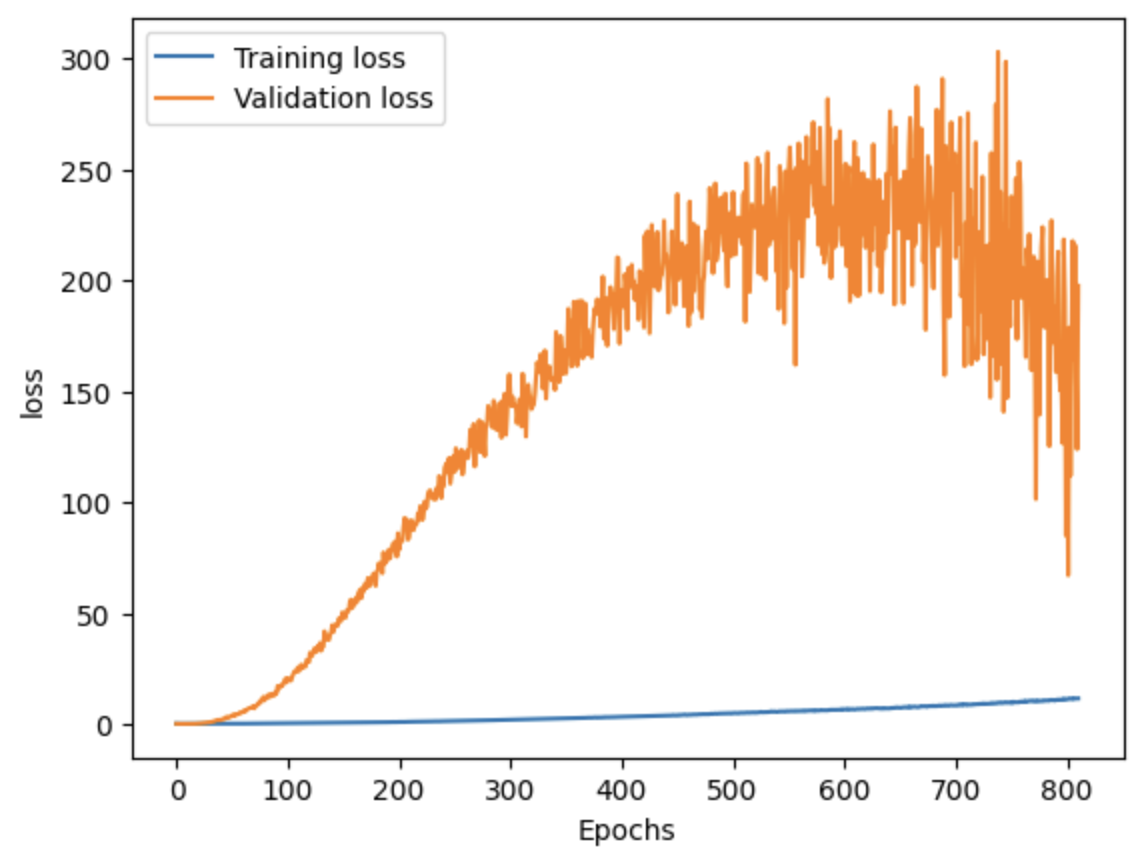

In [ ]:
# 예측값 계산
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.8).astype(int)

# 컨퓨전 메트릭스 계산
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

학습 결과 재현율의 성능은 향상되었지만 정밀도가 현저이 떨어졌습니다.

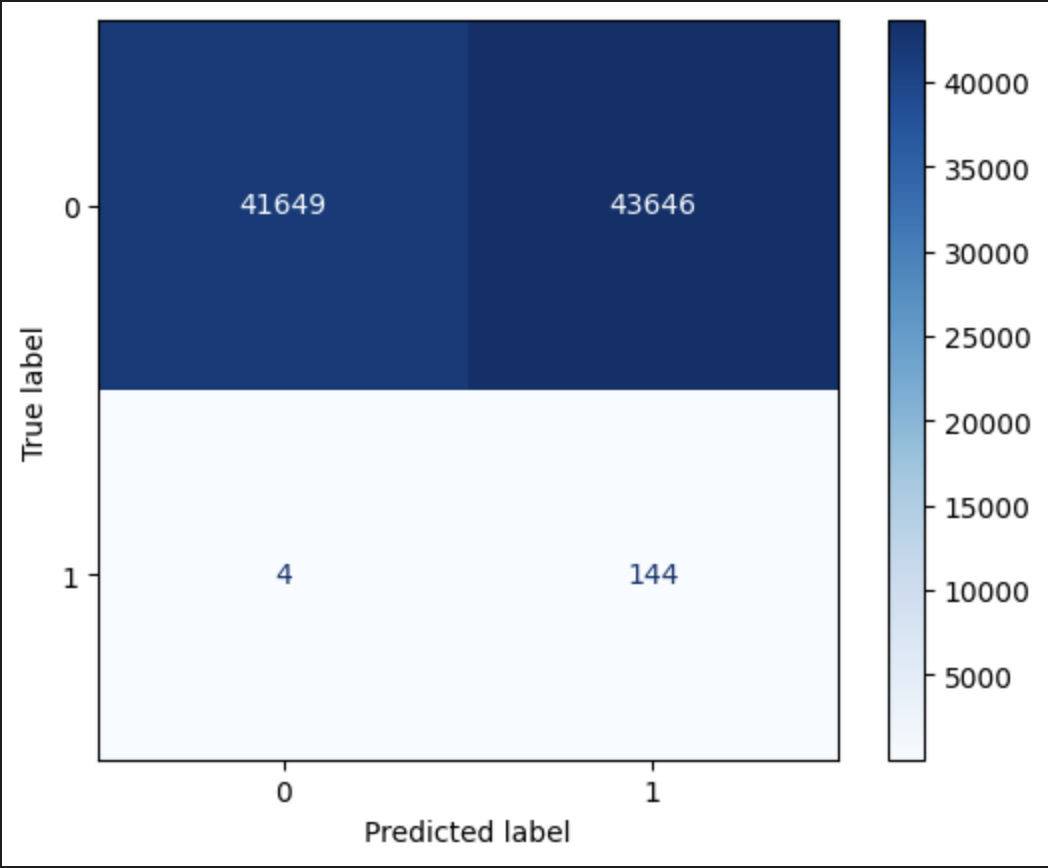

#오버샘플링 안한 train 데이터 사용

In [ ]:
with tf.device('/device:GPU:0'):
    model = Sequential()
    model.add(Dense(512, input_dim=29, activation='relu'))
    model.add(Dropout(0.2))  # Dropout 추가
    model.add(Dense(256, activation='relu'))  # 추가 층
    model.add(Dropout(0.2))  # 추가 Dropout
    model.add(Dense(1, activation='sigmoid'))

    # F1 Score 메트릭 정의
    f1_score = tfa.metrics.F1Score(num_classes=1, average=None, threshold=0.5)

    model.compile(loss='binary_crossentropy', # 이진분류이므로 binary_crossentropy 사용
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # 학습률 조정
                  metrics=[f1_score, Precision(), Recall()])

    es = EarlyStopping(monitor='val_loss', patience=50, mode='min', verbose=1)  # patience 값 조정

    # 모델 훈련
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                        epochs=100, callbacks=[es])  # 배치 크기 조정

Epoch 1/100
4362/4362 [==============================] - 22s 4ms/step - loss: 0.0132 - f1_score: 0.0968 - precision: 0.2143 - recall: 0.0625 - val_loss: 0.0064 - val_f1_score: 0.3768 - val_precision: 0.7647 - val_recall: 0.2500
Epoch 2/100
4362/4362 [==============================] - 17s 4ms/step - loss: 0.0050 - f1_score: 0.5898 - precision: 0.8271 - recall: 0.4583 - val_loss: 0.0042 - val_f1_score: 0.7119 - val_precision: 0.8630 - val_recall: 0.6058
Epoch 3/100
4362/4362 [==============================] - 17s 4ms/step - loss: 0.0040 - f1_score: 0.7500 - precision: 0.8641 - recall: 0.6625 - val_loss: 0.0036 - val_f1_score: 0.7541 - val_precision: 0.8734 - val_recall: 0.6635
Epoch 4/100
4362/4362 [==============================] - 17s 4ms/step - loss: 0.0039 - f1_score: 0.7529 - precision: 0.8446 - recall: 0.6792 - val_loss: 0.0038 - val_f1_score: 0.7263 - val_precision: 0.8667 - val_recall: 0.6250
Epoch 5/100
4362/4362 [==============================] - 17s 4ms/step - loss: 0.0038 - f

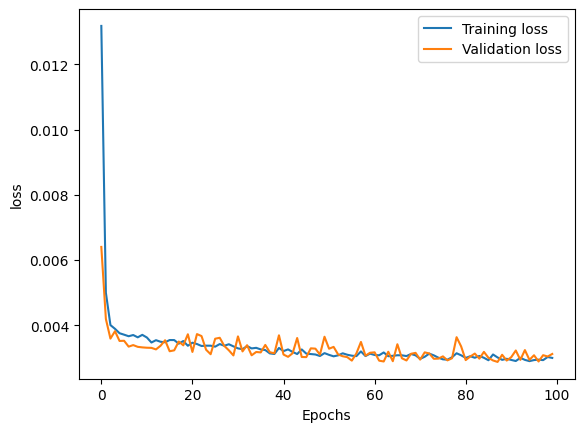

In [ ]:
# F1 Score 시각화
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터에 대한 예측값 계산
y_test_pred = model.predict(x_test) # test 데이터를 예측

# 이진 분류 임계값 설정
y_test_pred_binary = (y_test_pred > 0.4).astype(int) # 재현율를 높이기 위해 예측값이 0.4 이상이면 이상거래로 예측

# 예측값과 실제 값의 길이 출력
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_test_pred_binary: {len(y_test_pred_binary)}")

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("혼동 행렬:")
print(conf_matrix)

# 분류 보고서 생성
class_report = classification_report(y_test, y_test_pred_binary)
print("\n분류 보고서:")
print(class_report)

2671/2671 [==============================] - 3s 1ms/step
Length of y_test: 85443
Length of y_test_pred_binary: 85443
혼동 행렬:
[[85284    11]
 [   28   120]]

분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85295
         1.0       0.92      0.81      0.86       148

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# 최종 모델로 선정

정밀도 92, 재현율: 81, f1-score: 0.86

#데이터 불균형 해결을 위한 가중치 설정

In [ ]:
# 원본 데이터의 클래스 분포 기반 가중치 설정
total_samples = 284315 + 492
weight_for_0 = total_samples / (2 * 284315)
weight_for_1 = total_samples / (2 * 492)

class_weights = {0: weight_for_0, 1: weight_for_1}
print(class_weights)

# GPU 사용 설정
with tf.device('/device:GPU:0'):
    # Sequential 모델 초기화
    model = Sequential()

    # 첫 번째 Dense 층 추가, 512개의 뉴런, ReLU 활성화 함수, 입력 차원 29
    model.add(Dense(512, input_dim=29, activation='relu'))

    # 첫 번째 Dropout 층 추가, 드롭아웃 비율 0.2
    model.add(Dropout(0.2))

    # 두 번째 Dense 층 추가, 256개의 뉴런, ReLU 활성화 함수
    model.add(Dense(256, activation='relu'))

    # 두 번째 Dropout 층 추가, 드롭아웃 비율 0.2
    model.add(Dropout(0.2))

    # 출력층 추가, 1개의 뉴런, Sigmoid 활성화 함수
    model.add(Dense(1, activation='sigmoid'))

    # F1 Score 메트릭 정의
    f1_score = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

    # 모델 컴파일, Focal Loss 사용, Adam 옵티마이저, F1 Score, Precision, Recall 메트릭 설정
    model.compile(loss=SigmoidFocalCrossEntropy(), # 데이터 불균형 문제 해결을 위해 SigmoidFocalCrossEntropy로 적용하였습니다.
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=[f1_score, Precision(), Recall()])

    # EarlyStopping 콜백 정의, val_loss를 모니터링, 50 에포크 동안 개선이 없으면 학습 중지
    es = EarlyStopping(monitor='val_loss', patience=50, mode='min', verbose=1)

    # ReduceLROnPlateau 콜백 정의, val_loss를 모니터링, 10 에포크 동안 개선이 없으면 학습률 0.2배로 감소
    rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, mode='min', verbose=1) # 과접합 방지를 위해 Reduce LR On Plateau 함수 사용

    # 모델 훈련
    history = model.fit(x_train, y_train,  # 훈련 데이터 이때 모델의 불균형을 해결하기 위해 가중치를 설정하였음으로 오버샘플링을 안한 데이터를 사용하였습니다.
                        validation_data=(x_val, y_val),  # 검증 데이터
                        epochs=50,  # 최대 에포크 수
                        callbacks=[es, rlrop],  # 콜백 리스트
                        class_weight=class_weights)  # 클래스 가중치 적용



{0: 0.5008652375006595, 1: 289.4380081300813}
Epoch 1/50
4362/4362 [==============================] - 24s 4ms/step - loss: 0.0417 - f1_score: 0.1166 - precision: 0.0649 - recall: 0.5750 - val_loss: 0.0151 - val_f1_score: 0.7900 - val_precision: 0.8229 - val_recall: 0.7596 - lr: 1.0000e-04
Epoch 2/50
4362/4362 [==============================] - 18s 4ms/step - loss: 0.0294 - f1_score: 0.1374 - precision: 0.0753 - recall: 0.7833 - val_loss: 0.0282 - val_f1_score: 0.2804 - val_precision: 0.1673 - val_recall: 0.8654 - lr: 1.0000e-04
Epoch 3/50
4362/4362 [==============================] - 18s 4ms/step - loss: 0.0307 - f1_score: 0.0938 - precision: 0.0498 - recall: 0.8042 - val_loss: 0.0416 - val_f1_score: 0.1599 - val_precision: 0.0880 - val_recall: 0.8750 - lr: 1.0000e-04
Epoch 4/50
4362/4362 [==============================] - 18s 4ms/step - loss: 0.0273 - f1_score: 0.1146 - precision: 0.0617 - recall: 0.8042 - val_loss: 0.0097 - val_f1_score: 0.7391 - val_precision: 0.6746 - val_recall: 0.

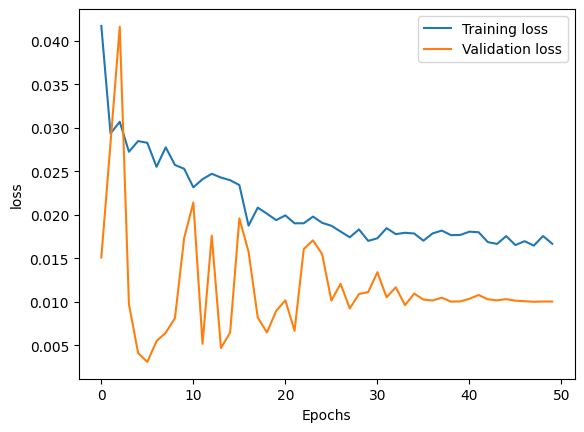

In [ ]:
# F1 Score 시각화
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

2671/2671 [==============================] - 3s 1ms/step


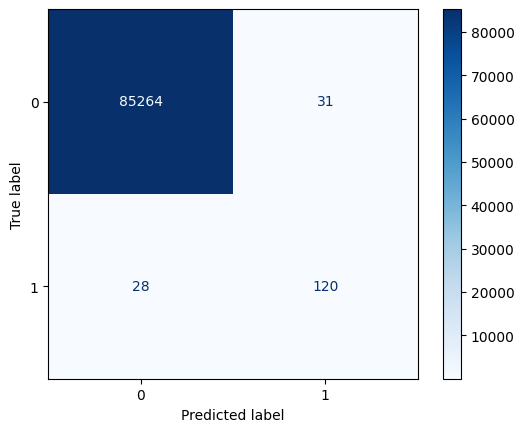

In [ ]:
# 예측값 계산
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.8).astype(int)

# 컨퓨전 메트릭스 계산
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [ ]:
# 테스트 데이터에 대한 예측값 계산
y_test_pred = model.predict(x_test) # test 데이터를 예측

# 이진 분류 임계값 설정
y_test_pred_binary = (y_test_pred > 0.8).astype(int) # 정밀도를 높이기 위해 예측값이 0.8 이상이면 이상거래로 예측

# 예측값과 실제 값의 길이 출력
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_test_pred_binary: {len(y_test_pred_binary)}")

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("혼동 행렬:")
print(conf_matrix)

# 분류 보고서 생성
class_report = classification_report(y_test, y_test_pred_binary)
print("\n분류 보고서:")
print(class_report)

# f1-score 계산
f1score = f1_score(y_test, y_test_pred_binary)
print("\nf1-score 점수:")
print(f1score)

2671/2671 [==============================] - 4s 1ms/step
Length of y_test: 85443
Length of y_test_pred_binary: 85443
혼동 행렬:
[[85264    31]
 [   28   120]]

분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85295
         1.0       0.79      0.81      0.80       148

    accuracy                           1.00     85443
   macro avg       0.90      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443


f1-score 점수:
0.802675585284281


오버샘플링 안한 데이터가 성능이 더 높게나온것을 확인하였습니다.

평가: 손실함수를 설정 할 때 SigmoidFocalCrossEntropy 보단 binary_crossentropy의 성능이 더 잘나와 손실함수를 binary_crossentropy로  채택하였습니다.



아쉬운점: 금융 프로젝트 특성상 재현율이 중요한데 예측 모델의 재현율 성능이 기대보다 안나와 아쉬웠습니다.

정밀도 92, 재현율: 81, f1-score: 0.86